In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [28]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [33]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [34]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [36]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=df['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]= X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\DSingh\AppData\Local\Temp\ipykernel_13720\2307505765.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=df['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\User

In [37]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([27.  , 21.  , 30.  ,  2.  , 24.  , 35.  , 28.  , 25.  ,  4.  ,
       34.5 , 21.  , 33.  , 32.  ,  0.75, 56.  , 58.  , 22.  , 37.  ,
       36.  , 32.  , 40.  , 33.  , 38.  , 41.  , 34.  , 30.  , 45.  ,
       33.  , 22.  , 33.  , 37.  , 44.  , 22.  , 27.  , 48.  , 31.  ,
       41.  , 56.  , 28.  , 25.  ,  4.  , 30.5 , 24.  , 36.  , 22.  ,
       13.  , 31.  , 51.  , 45.  , 26.  , 24.  , 16.  , 43.  , 26.  ,
       42.  , 62.  , 36.  , 46.  , 17.  , 21.  , 45.  , 18.  , 60.  ,
       40.  , 17.  , 16.  , 28.  , 37.  , 18.  , 28.  , 30.  , 36.  ,
       23.  ,  3.  , 25.  , 60.  , 65.  , 44.  , 23.  , 18.  , 39.  ,
       45.  , 36.  , 33.  ,  9.  , 36.5 , 26.  , 18.  ,  0.83, 71.  ,
        4.  , 48.  , 47.  ,  8.  , 40.  , 20.  , 24.  , 24.  , 31.  ,
        4.  , 29.  , 35.  , 25.  , 32.  , 40.  , 20.  ,  7.  ,  4.  ,
       32.5 , 48.  , 70.  , 38.  , 29.  , 28.  , 56.  , 30.  , 58.  ,
       25.  , 27.  ,  9.  , 21.  , 30.  , 22.  , 16.  , 19.  , 23.  ,
       40.  , 35.  ,

In [38]:
X_train['Age'].isnull().sum()

np.int64(148)

In [39]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,61.0
493,71.0,49.5042,71.0
527,NaN,221.7792,18.0


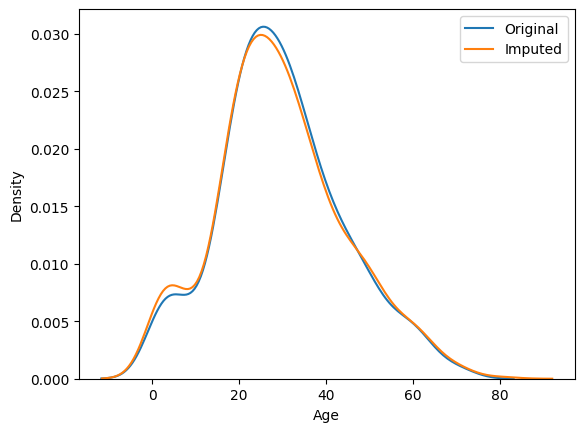

In [42]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [43]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  218.97789098121024


In [44]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,61.931908
Age,71.512440,204.349513,204.349513
Age_imputed,61.931908,204.349513,218.977891


<Axes: >

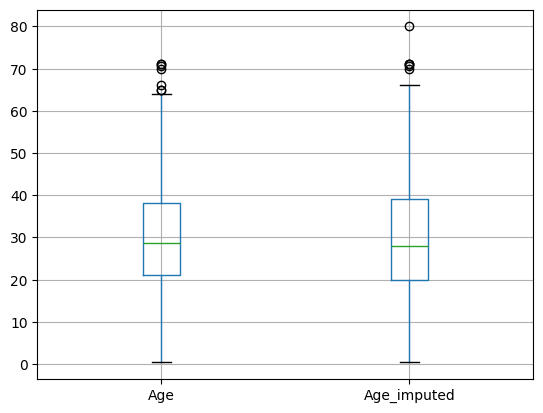

In [45]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
## while making the production based project we have to be sure of the storing the value of the random state 

## example sample: for 50 it gives 40
## next time it must porduce the same random 40 for 50
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# for Categorical data

In [47]:
data = pd.read_csv('House_train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [48]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [49]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [50]:
X = data
y = data['SalePrice']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [53]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
410,NaN,TA,60000,TA,NaN
442,Gd,TA,162900,TA,Gd
401,Gd,TA,164990,TA,Gd
934,Gd,TA,242000,TA,Gd
413,Gd,TA,115000,TA,Gd


In [54]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\DSingh\AppData\Local\Temp\ipykernel_13720\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQua

In [55]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [56]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [57]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.546577
Fa,0.040917,0.053872
Po,0.027823,0.034792
Ex,0.024550,0.031425


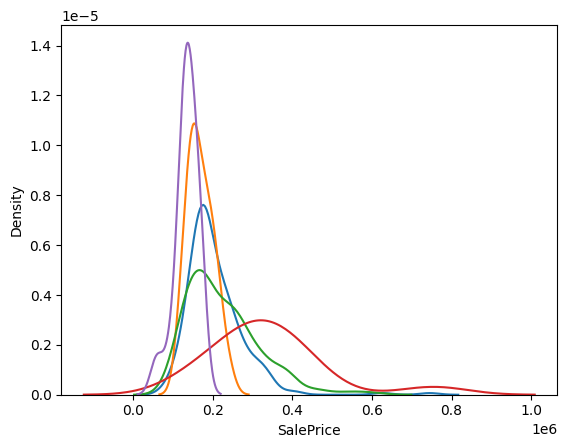

In [58]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

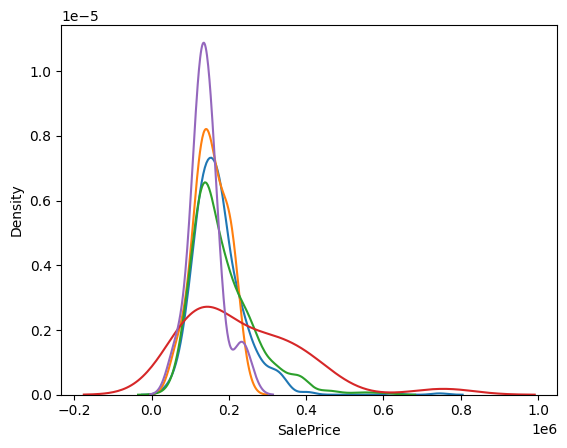

In [59]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()